# Assignment 2 - Air Pollution
## Air Pollution is Rising!
### Predicting Pollution Levels using Machine Learning
### It is winter time in Delhi so Cody decided to go for a walk to the news stand and on reaching was surprised to see the air quality index of Delhi in the newspaper . So he decided to collect the air samples of different locations and then took these samples to his lab where he extracted five features of the air he collected which can be used to predict the air quality index and combined it with the air quality index given in the newspapers. You are provided with the data collected by Cody and your job is to design a machine learning model which given the features extracted by Cody can predict air quality.
### Data consist of three csv files :- 1. Train.csv 2. Test.csv
### Train:- The train data consists of five feature columns and one target column. All the feature columns are numeric and target value is also numeric.
### Test:- Test data consist all the columns contained by train with the exception of target column which u have to predict using the model trained on train data.
### Please find the attached training and testing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
dftrain=pd.read_csv('Train.csv')
dftest=pd.read_csv('Test.csv')
print(dftrain.head())
print(dftrain.shape)
print(dftest.head())
print(dftest.shape)

   feature_1  feature_2  feature_3  feature_4  feature_5     target
0   0.293416  -0.945599  -0.421105   0.406816   0.525662 -82.154667
1  -0.836084  -0.189228  -0.776403  -1.053831   0.597997 -48.897960
2   0.236425   0.132836  -0.147723   0.699854  -0.187364  77.270371
3   0.175312   0.143194  -0.581111  -0.122107  -1.292168  -2.988581
4  -1.693011   0.542712  -2.798729  -0.686723   1.244077 -37.596722
(1600, 6)
   feature_1  feature_2  feature_3  feature_4  feature_5
0   1.015254   2.076209  -0.266435  -2.418088  -0.980503
1  -0.375021   0.953185   0.626719   0.704406  -0.355489
2  -1.024452   0.962991  -0.407942  -1.861274   0.455201
3  -2.489841   0.544802   0.601219  -0.607021  -1.314286
4  -0.384675  -0.833624   1.358552  -0.547932   0.411925
(400, 5)


In [21]:
one=np.ones(dftrain.shape[0])
x_train=np.c_[one,dftrain['feature_1'],dftrain['feature_2'],dftrain['feature_3'],dftrain['feature_4'],dftrain['feature_5']]
print(x_train)
#print(x_train[0].shape)

[[ 1.          0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [ 1.         -0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 1.          0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.          1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [ 1.         -1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [ 1.         -1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]
(6,)


In [19]:
y_train=dftrain['target']
y_train=y_train.values.reshape(-1)
print(y_train)

[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [23]:
def hypothesis(x,theta):
    return np.dot(x,theta)

In [24]:
def error(x,theta,y):
    err=0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        err+=(hx-y[i])**2
    return err

In [39]:
def gradient(x,theta,y):
    grad=np.zeros(theta.shape)
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],theta)
        for j in range(x[i].shape[0]):
            grad[j]+=(hx-y[i])*x[i][j]
    return grad/x.shape[0]
    

In [36]:
def gradient_descent(x,y,learning_rate=0.01):
    theta=np.zeros((x.shape[1]))
    err_list=[]
    theta_list=[]
    for i in range(1000):
        err=error(x,theta,y)
        err_list.append(err)
        theta_list.append(theta)
        d=gradient(x,theta,y)
        for j in range(theta.shape[0]):
            theta[j]-=learning_rate*d[j]
    return theta,err_list,theta_list

In [40]:
final_value,err_list,theta_list=gradient_descent(x_train,y_train)

In [41]:
final_value

array([ 4.98825521, 29.67987527, 92.65908015,  8.27756078, 44.76510038,
        2.51769725])

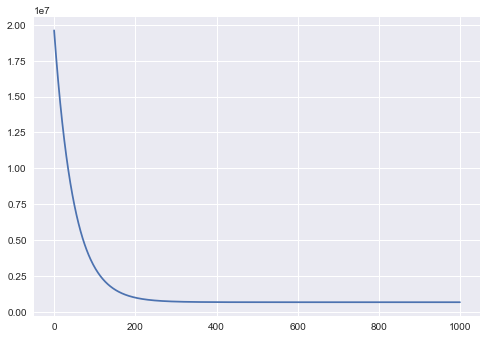

In [42]:
plt.plot(err_list)
plt.show()

In [48]:
one=np.ones(dftest.shape[0])
x_test=np.c_[one,dftest['feature_1'],dftest['feature_2'],dftest['feature_3'],dftest['feature_4'],dftest['feature_5']]
print(x_test)

[[ 1.00000000e+00  1.01525387e+00  2.07620944e+00 -2.66434820e-01
  -2.41808820e+00 -9.80502790e-01]
 [ 1.00000000e+00 -3.75021204e-01  9.53184528e-01  6.26719138e-01
   7.04405750e-01 -3.55489211e-01]
 [ 1.00000000e+00 -1.02445225e+00  9.62991107e-01 -4.07942004e-01
  -1.86127383e+00  4.55201351e-01]
 ...
 [ 1.00000000e+00  5.54727647e-01  1.76824345e+00 -8.97787210e-01
  -1.19366107e+00  3.40563374e-01]
 [ 1.00000000e+00 -1.62717246e+00  8.56470994e-01 -5.65729519e-04
   6.29386649e-01  4.53382144e-01]
 [ 1.00000000e+00  1.39310499e-01  5.31597186e-01 -8.53107053e-01
   3.16920076e-02  1.71489304e+00]]


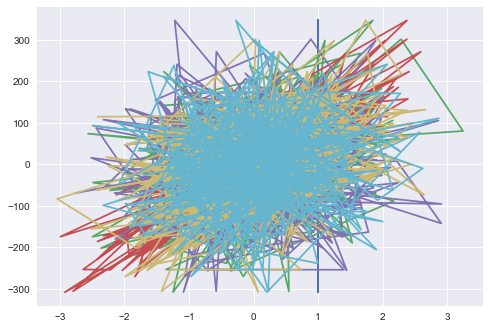

In [53]:
plt.plot(x_test,hypothesis(x_test,final_value))

# Using sklearn

In [54]:
dftrain=pd.read_csv('Train.csv')
dftest=pd.read_csv('Test.csv')
print(dftrain.head())
print(dftrain.shape)
print(dftest.head())
print(dftest.shape)

   feature_1  feature_2  feature_3  feature_4  feature_5     target
0   0.293416  -0.945599  -0.421105   0.406816   0.525662 -82.154667
1  -0.836084  -0.189228  -0.776403  -1.053831   0.597997 -48.897960
2   0.236425   0.132836  -0.147723   0.699854  -0.187364  77.270371
3   0.175312   0.143194  -0.581111  -0.122107  -1.292168  -2.988581
4  -1.693011   0.542712  -2.798729  -0.686723   1.244077 -37.596722
(1600, 6)
   feature_1  feature_2  feature_3  feature_4  feature_5
0   1.015254   2.076209  -0.266435  -2.418088  -0.980503
1  -0.375021   0.953185   0.626719   0.704406  -0.355489
2  -1.024452   0.962991  -0.407942  -1.861274   0.455201
3  -2.489841   0.544802   0.601219  -0.607021  -1.314286
4  -0.384675  -0.833624   1.358552  -0.547932   0.411925
(400, 5)


In [56]:
x_train=pd.DataFrame(np.c_[dftrain['feature_1'],dftrain['feature_2'],dftrain['feature_3'],dftrain['feature_4'],dftrain['feature_5']],columns=['feature_1','feature_2','feature_3','feature_4','feature_5'])
x_train

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077
...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149
1596,-0.076099,0.255257,0.290054,1.796036,0.340350
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334


In [59]:
y_train=pd.DataFrame(dftrain['target'],columns=['target'])
y_train

,target
0,-82.154667
1,-48.897960
2,77.270371
3,-2.988581
4,-37.596722
...,...
1595,-80.110012
1596,118.315601
1597,-107.510508
1598,-47.341558


In [60]:
x_test=pd.DataFrame(np.c_[dftest['feature_1'],dftest['feature_2'],dftest['feature_3'],dftest['feature_4'],dftest['feature_5']],columns=['feature_1','feature_2','feature_3','feature_4','feature_5'])
x_test

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()

In [63]:
model.fit(x_train,y_train)

LinearRegression()

In [64]:
model.score(x_train,y_train)

0.9660939669975617

In [67]:
bias=model.intercept_
coef=model.coef_
print(bias,coef)

[4.99096674] [[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]]


In [66]:
output=model.predict(x_test)
print(output)

[[ 1.14583689e+02]
 [ 1.18012815e+02]
 [-2.17398523e+01]
 [-4.39368985e+01]
 [-9.59148984e+01]
 [-4.45074240e+01]
 [-7.55665260e+01]
 [ 2.38208355e+01]
 [ 1.73835284e+02]
 [ 1.72849290e+02]
 [-1.05402312e+02]
 [-2.08020234e+01]
 [-3.91323777e+00]
 [ 1.22999186e+02]
 [ 4.03078842e+01]
 [ 4.57128495e+01]
 [-1.89628491e+02]
 [ 2.26125454e+01]
 [ 1.16410473e+01]
 [ 1.36342143e+02]
 [ 6.49162552e+01]
 [-6.19884884e+01]
 [-1.08194679e+02]
 [-7.41212747e+00]
 [-5.85239528e+01]
 [ 1.18889777e+01]
 [ 2.92376400e+01]
 [ 1.07687579e+02]
 [ 2.41468563e+01]
 [-2.61050120e+01]
 [ 1.10968076e+02]
 [-4.48797096e+01]
 [ 2.16799939e+02]
 [-1.38606052e+01]
 [-2.28603182e+02]
 [ 1.54896021e+02]
 [-2.22583390e+00]
 [ 1.27230344e+01]
 [-3.08307877e+02]
 [ 7.71107583e+01]
 [-8.12079177e+01]
 [-2.06632925e+02]
 [-2.38762881e+02]
 [ 1.34757365e+02]
 [-7.37514777e+01]
 [ 1.05463702e+02]
 [-3.59074927e+00]
 [ 2.06043839e+01]
 [-9.80187354e+01]
 [-2.75169049e+01]
 [ 1.08159001e+01]
 [-1.74463534e+02]
 [ 6.5155751